# Datenimport und -vorbereitung

In [98]:
import pandas as pd

df = pd.read_csv('./data/iris_dirty.csv',
                 header=None, # A
                 names=['sepal_length', 'sepal_width', # B
                        'petal_length', 'petal_width', 'class']
)

In [99]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [100]:
df.count()

sepal_length    151
sepal_width     150
petal_length    151
petal_width     151
class           151
dtype: int64

In [101]:
df[df['sepal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [102]:
iris_versicolor = df[df['class'] == 'Iris-versicolor']
meanSepalWidth = pd.Series.mean(iris_versicolor['sepal_width'])
df.loc[82, 'sepal_width'] = meanSepalWidth
df.count()

sepal_length    151
sepal_width     151
petal_length    151
petal_width     151
class           151
dtype: int64

### Dubletten entfernen


In [103]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,class
9,4.9,3.1,1.5,1 mm,Iris-setosa
34,4.9,3.1,1.5,1 mm,Iris-setosa
37,4.9,3.1,1.5,1 mm,Iris-setosa
50,7.0,3.2,4.7,14 mm,Iris-versicolor
100,7.0,3.2,4.7,14 mm,Iris-versicolor


In [104]:
df.groupby('class').count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,51,51,51,51
Iris-virginica,50,50,50,50


In [105]:
# Weiteres problem -> Iris-setsoa Tippfehler
df[df['class'] == 'Iris-setsoa']

,sepal_length,sepal_width,petal_length,petal_width,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [106]:
df.loc[49, 'class'] = 'Iris-setosa'

In [107]:
df.groupby('class').count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,51,51,51,51
Iris-virginica,50,50,50,50


Super, geschafft!

### Uneinheitliche Einheiten

In [108]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [109]:
pd.to_numeric('2 mm'.replace(' mm', '')) / 10

0.2

In [110]:
def convert_from_mm(row):
    return pd.to_numeric(row['petal_width'].replace(' mm', '')) / 10
df['petal_width'] = df.apply(convert_from_mm, axis='columns')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Unplausible Daten (Ausreißer)

In [111]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,151.000000,151.000000,151.000000,151.000000
mean,6.196689,3.055497,3.764901,1.200000
std,4.324325,0.431921,1.760197,0.760789
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

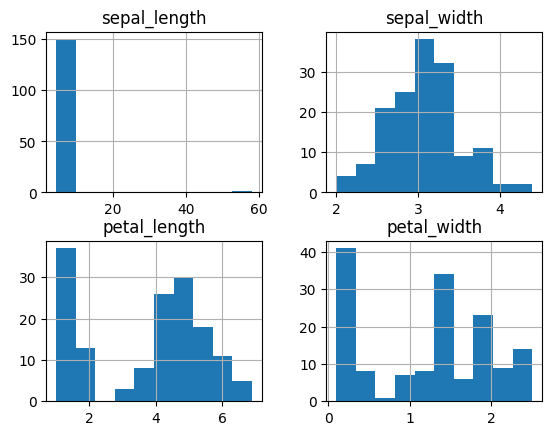

In [112]:
df.hist()

In [113]:
df.groupby('class').describe()

sepal_length                                                 \
                       count      mean       std  min  25%  50%   75%   max   
class                                                                         
Iris-setosa             50.0  5.006000  0.352490  4.3  4.8  5.0  5.20   5.8   
Iris-versicolor         51.0  5.956863  0.532261  4.9  5.6  5.9  6.30   7.0   
Iris-virginica          50.0  7.632000  7.295356  4.9  6.3  6.5  7.05  58.0   

                sepal_width         ... petal_length      petal_width  \
                      count   mean  ...          75%  max       count   
class                               ...                                 
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0   
Iris-versicolor        51.0  2.780  ...        4.600  5.1        51.0   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
class                                                         
Iris-setosa      0.244000  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.327451  0.196039  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026000  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

class
Iris-setosa        [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
Iris-versicolor    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
Iris-virginica     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

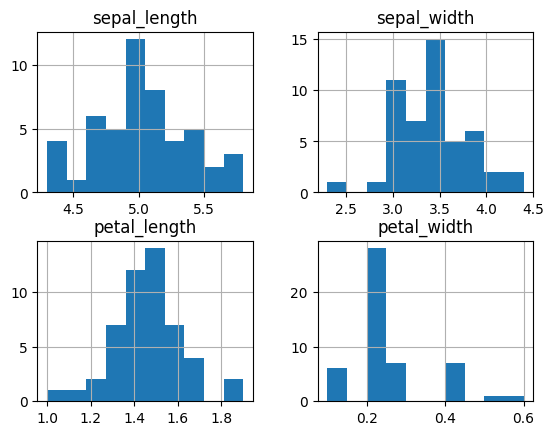

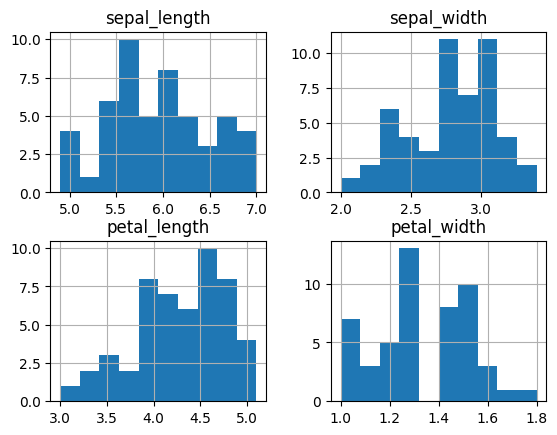

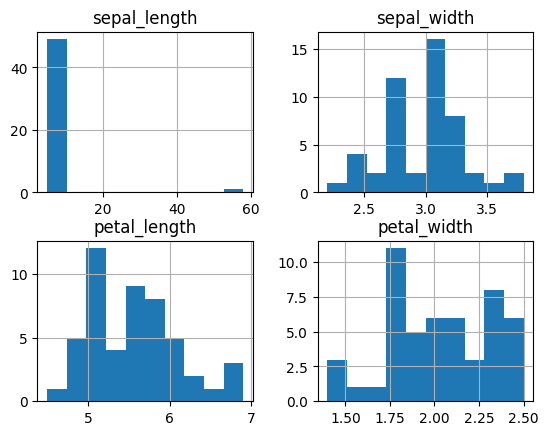

In [114]:
df.groupby('class').hist()

In [115]:
df[df['sepal_length'] == 58]

,sepal_length,sepal_width,petal_length,petal_width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


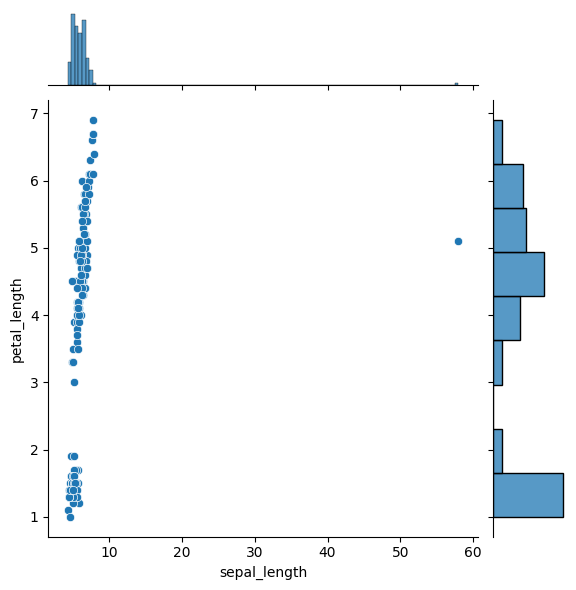

In [116]:
import seaborn as sns
sns.jointplot(x=df['sepal_length'], y=df['petal_length'])

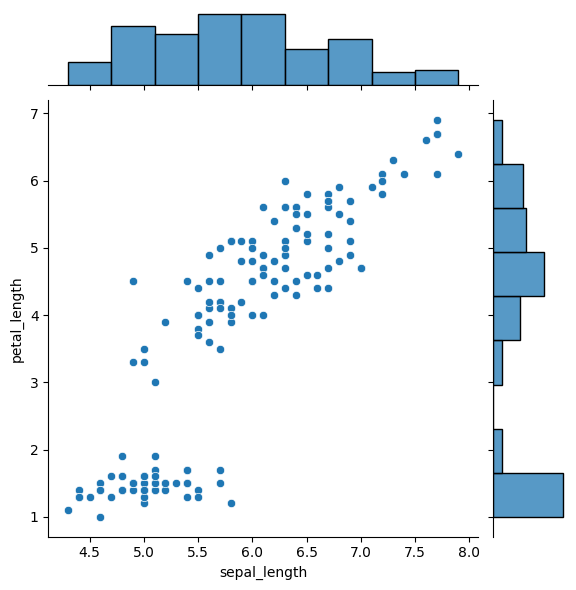

In [117]:
# Ausreißer wird korrigiert
df.loc[143, 'sepal_length'] = 5.8
sns.jointplot(x=df['sepal_length'], y=df['petal_length'])

In [119]:
corrmat = df[['sepal_width', 'sepal_height', "petal_width", 'petal_length']].corr()
sns.heatmap(corrmat, annot=True)

KeyError: "['sepal_height', 'pedal_width', 'pedal_height'] not in index"